<a href="https://colab.research.google.com/github/SergeyMitrofanov88/Forecasting_for_RES/blob/main/HPP_LW2_inflowTunguska.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Метод линейной регрессии

Регрессия – это условное математическое ожидание непрерывной зависимой (выходной) переменной при наблюдаемых значениях независимых (входных) переменных. Линейная регрессия основана на гипотезе, что искомая зависимость – линейная. Каждая независимая переменная вносит аддитивный вклад в результирующее значение с некоторым весом, называемом коэффициентом регрессии.

Если установлена тесная линейная корреляция между переменными, то можно вывести уравнение прямой и использовать её для прогнозирования поведения зависимой переменной в будущем. Этот процесс носит название ЛИНЕЙНОЙ РЕГРЕССИИ.

Линейная модель уравнения регрессии строится по методу наименьших квадратов. Этот критерий минимизирует сумму квадратов вертикальных отклонений точек от прямой регрессии.

Достоинства линейной регрессии:
*   Скорость и простота получения модели.
*   Интерпретируемость модели. Линейная модель является прозрачной и понятной для аналитика.


## Метод полиномиальной регрессии

Полиномиальная регрессия означает приближение данных (xi,yi) полиномом k–й степени A(x)=a+b×x+c×x^2+d×x^3+…+h×x^k. При k=1 полином является прямой линией, при k=2 – параболой, при k=3 – кубической параболой и т. д.

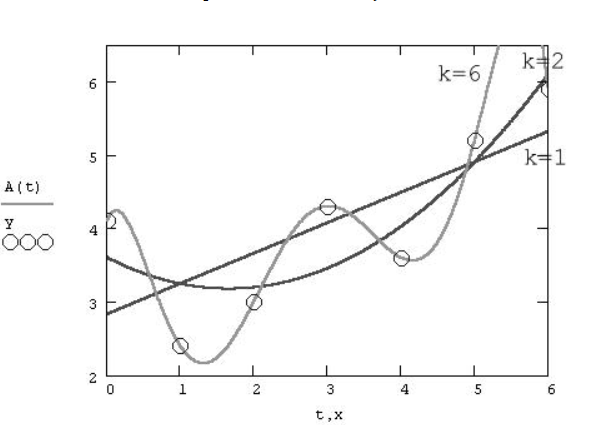

## Описание параметров оценки качества прогнозной модели

Наиболее часто на практике для анализа адекватности модели прогноза исследуемым различным процессам используются абсолютные показатели, позволяющие количественно определить величину ошибки моделирования в единицах измерения прогнозируемого объекта. К ним относятся:



*   абсолютная ошибка, определяемая как разность между фактическим значением показателя и его расчётным значением






image.png

*   средняя абсолютная ошибка




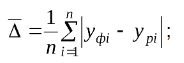

*   среднеквадратическая ошибка

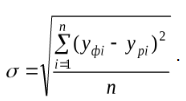

Следует отметить, что абсолютные показатели малопригодны для сравнения и анализа точности моделирования разнородных объектов, так как их значения существенно зависят от масштаба измерения исследуемых явлений. В этих случаях используются относительные показатели:

*   относительная ошибка




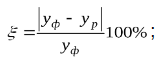




*   средняя относительная ошибка

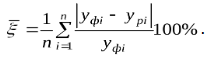

## Импорт библиотек

In [ ]:
#Для работы с данными
import pandas as pd
import numpy as np

#Для визуализации
import matplotlib.pyplot as plt
import seaborn as sn

#Для моделей регрессии
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn import tree

#Для разделения данных на выборки
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

#Для оценивания прогноза (метрики точности)
import sklearn.metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import max_error

In [ ]:
def MAPE(y_t, y_p):
  y_t, y_p = np.array(y_t), np.array(y_p)
  Err=np.mean(np.abs((y_t - y_p)/y_t) * 100)
  return (Err)

In [ ]:
inflow_data2 = pd.read_excel('/content/drive/MyDrive/ЛР2.xlsx', sheet_name= 'В8.Нижняя_Тунгуска')
data = pd.DataFrame(data=inflow_data2)
data

,Месяцы/годы,1,2,3,4,5,6,7,8,9,10,11,12
0,1939,231.0,138.0,123.0,134.0,7300,18600,2730,2220,5170,1790,860,507
1,1940,161.0,144.0,126.0,124.0,6680,20100,6940,2600,2290,844,735,380
2,1941,301.0,216.0,184.0,179.0,10000,17200,4620,2710,3640,2120,524,515
3,1942,391.0,262.0,234.0,520.0,8600,16000,4760,1540,4950,1350,566,502
4,1943,338.0,218.0,160.0,173.0,16900,10900,8230,2870,3130,2590,778,534
5,1944,450.0,314.0,260.0,282.0,7040,19800,6140,4930,5190,2630,970,730
6,1945,405.0,343.0,302.0,224.0,15600,9500,4050,2090,1850,2300,532,432
7,1946,189.0,172.0,161.0,183.0,6240,20900,7130,1740,1770,1700,622,428
8,1947,125.0,105.0,86.4,87.7,14600,10600,5190,1320,2870,2000,475,208
9,1948,297.0,244.0,202.0,172.0,3910,21700,6570,2990,2550,1570,583,468


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Установка первого столбца в качестве индекса строк
data.set_index(data.iloc[:, 0], inplace=True)
data.drop(data.columns[0], axis=1, inplace=True)
data

,1,2,3,4,5,6,7,8,9,10,11,12
Месяцы/годы,,,,,,,,,,,,
1939,231.0,138.0,123.0,134.0,7300,18600,2730,2220,5170,1790,860,507
1940,161.0,144.0,126.0,124.0,6680,20100,6940,2600,2290,844,735,380
1941,301.0,216.0,184.0,179.0,10000,17200,4620,2710,3640,2120,524,515
1942,391.0,262.0,234.0,520.0,8600,16000,4760,1540,4950,1350,566,502
1943,338.0,218.0,160.0,173.0,16900,10900,8230,2870,3130,2590,778,534
1944,450.0,314.0,260.0,282.0,7040,19800,6140,4930,5190,2630,970,730
1945,405.0,343.0,302.0,224.0,15600,9500,4050,2090,1850,2300,532,432
1946,189.0,172.0,161.0,183.0,6240,20900,7130,1740,1770,1700,622,428
1947,125.0,105.0,86.4,87.7,14600,10600,5190,1320,2870,2000,475,208


In [ ]:
# Преобразование DataFrame в Series
series = data.stack()
print(series)

Месяцы/годы    
1939         1      231.0
             2      138.0
             3      123.0
             4      134.0
             5     7300.0
                    ...  
1981         8     1520.0
             9     1290.0
             10     641.0
             11     404.0
             12     348.0
Length: 516, dtype: float64


In [ ]:
data.dtypes

1     float64
2     float64
3     float64
4     float64
5       int64
6       int64
7       int64
8       int64
9       int64
10      int64
11      int64
12      int64
dtype: object

In [ ]:
# Создание новой серии со сдвинутыми значениями
data_shift = series.shift(-1)[0:]
data_shift = data_shift.iloc[:-1]
data_shift

Месяцы/годы    
1939         1       138.0
             2       123.0
             3       134.0
             4      7300.0
             5     18600.0
                    ...   
1981         7      1520.0
             8      1290.0
             9       641.0
             10      404.0
             11      348.0
Length: 515, dtype: float64

In [ ]:
series = series.iloc[:-1]

In [ ]:
X = data_shift
y = series

In [ ]:
X_train = X.iloc[0:round(len(data_shift)*0.8)]
y_train = y.iloc[0:round(len(series)*0.8)]
X_test = X.iloc[round(len(data_shift)*0.8):]
y_test = y.iloc[round(len(series)*0.8):]
#сохраняем тестовую выборку на всякий случай
y_test.to_excel('/y_test.xlsx')
X_test.to_excel('/X_test.xlsx')

In [ ]:
X_train = X_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

##Линейная регрессия

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
scoring  = {'R2': 'r2',
           '-MSE': 'neg_mean_squared_error',
           '-MAE': 'neg_mean_absolute_error',
           'Max': 'max_error'}
scores = cross_validate(lin_reg, X_train, y_train, scoring = scoring, cv=ShuffleSplit(n_splits=4))
y_pred = lin_reg.predict(X_test)
print('Cross-Validation errors')
DF_reg = pd.DataFrame(scores)
display(DF_reg)
print('Test errors')
print('Mean squared error on test_set: %.4f' % mse(y_test,y_pred))
print('Root Mean Square Error on test_set: %.4f' % mse(y_test,y_pred, squared=False))
print('Root Absolute Percented Error on test_set: %.4f' % MAPE(y_test,y_pred))
print('R2  on test_set: %.4f' %  r2_score(y_test,y_pred))

Cross-Validation errors


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_Max
0,0.001290,0.002599,0.115299,-3.324711e+07,-3682.737068,-17347.907880
1,0.000974,0.000987,-0.876357,-4.868362e+06,-1909.901705,-4790.635065
2,0.000905,0.000928,0.086074,-4.217622e+07,-4094.275930,-22782.984492
3,0.000809,0.000879,0.120360,-1.615412e+07,-2574.127588,-20302.663357


Test errors
Mean squared error on test_set: 43376679.0086
Root Mean Square Error on test_set: 6586.0974
Root Absolute Percented Error on test_set: 587.9883
R2  on test_set: 0.0576


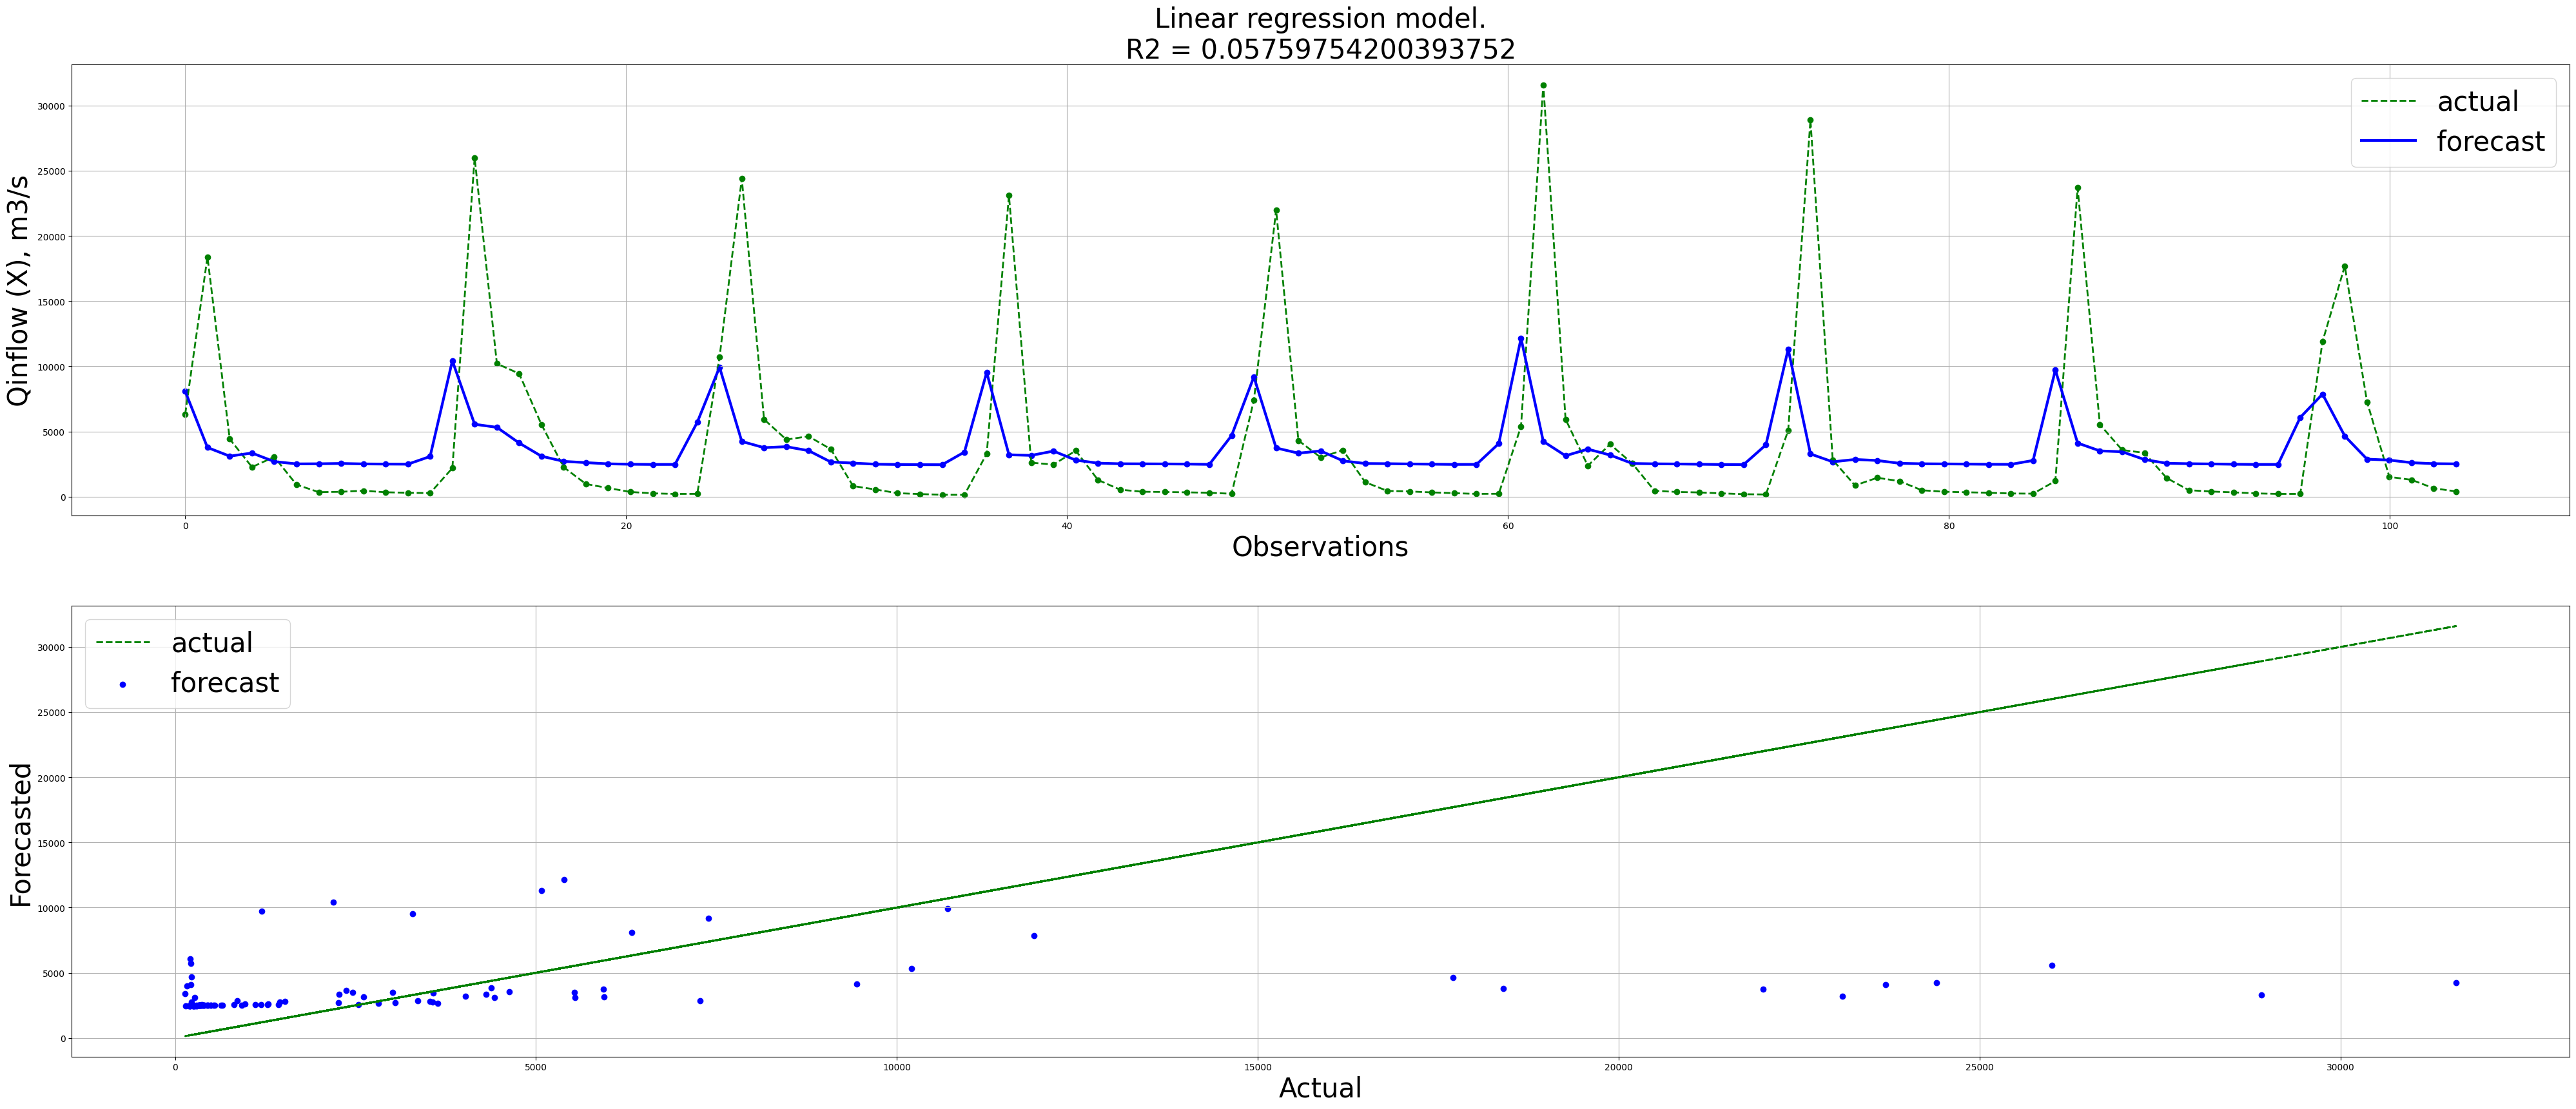

In [ ]:
#Визуализация результатов

x = np.linspace(0, X_test.shape[0], X_test.shape[0])
plt.figure(figsize=(50,20))
plt.subplot(2,1,1)
plt.title(f'Linear regression model.\nR2 = {r2_score(y_test,y_pred)}', fontsize=30)
plt.scatter(x, y_pred, c='b')
plt.scatter(x, y_test, c='g')
plt.plot(x, y_test, '--g', linewidth=2, label='actual')
plt.plot(x, y_pred, '-b', linewidth=3, label='forecast')
plt.legend(fontsize=30)
plt.xlabel('Observations', fontsize=30)
plt.ylabel('Qinflow (X), m3/s', fontsize=30)
plt.grid()
plt.subplot(2,1,2)
plt.plot(y_test, y_test, '--g', linewidth=2, label='actual')
plt.scatter(y_test, y_pred, label='forecast', c='b')
plt.legend(fontsize=30)
plt.xlabel('Actual', fontsize=30)
plt.ylabel('Forecasted', fontsize=30)
plt.grid()

##Полиномиальная регрессия

In [ ]:
from sklearn.preprocessing import PolynomialFeatures as poly
from sklearn.pipeline import Pipeline

In [ ]:
PF = poly(degree=2, include_bias=True, interaction_only=False)
#Rid = Ridge(alpha=0.1)
LR = LinearRegression()
pipe = Pipeline([('polynomial_features', PF), ('lr', LR)])
pipe.fit(X_train, y_train)
scoring_pipe  = {'R2': 'r2',
           '-MSE': 'neg_mean_squared_error',
           '-MAE': 'neg_mean_absolute_error',
           'Max': 'max_error'}
scores_pipe = cross_validate(pipe, X_train, y_train, scoring = scoring_pipe, cv=ShuffleSplit(n_splits=5))
y_pred_pipe = pipe.predict(X_test)
print('Cross-Validation error')
DF_reg_pipe = pd.DataFrame(scores_pipe)
display(DF_reg_pipe)

print('Mean squared error on test_set: %.4f' % mse(y_test,y_pred_pipe))
print('Root Mean Square Error on test_set: %.4f' % mse(y_test,y_pred_pipe, squared=False))
print('Root Absolute Percented Error on test_set: %.4f' % MAPE(y_test,y_pred_pipe))
print('R2  on test_set: %.4f' %  r2_score(y_test,y_pred_pipe))

Cross-Validation error


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_Max
0,0.002316,0.001384,0.360908,-2.116803e+07,-2220.724159,-22456.340971
1,0.001729,0.001132,-0.275398,-1.266870e+07,-2292.692710,-10517.423251
2,0.001897,0.001146,0.189641,-3.659485e+07,-3544.202924,-18496.450156
3,0.001594,0.001132,0.254695,-4.623549e+07,-3224.926280,-29103.457839
4,0.001573,0.001031,0.126938,-5.187094e+07,-4266.497973,-22540.400754


Mean squared error on test_set: 35561308.6589
Root Mean Square Error on test_set: 5963.3303
Root Absolute Percented Error on test_set: 547.9142
R2  on test_set: 0.2274


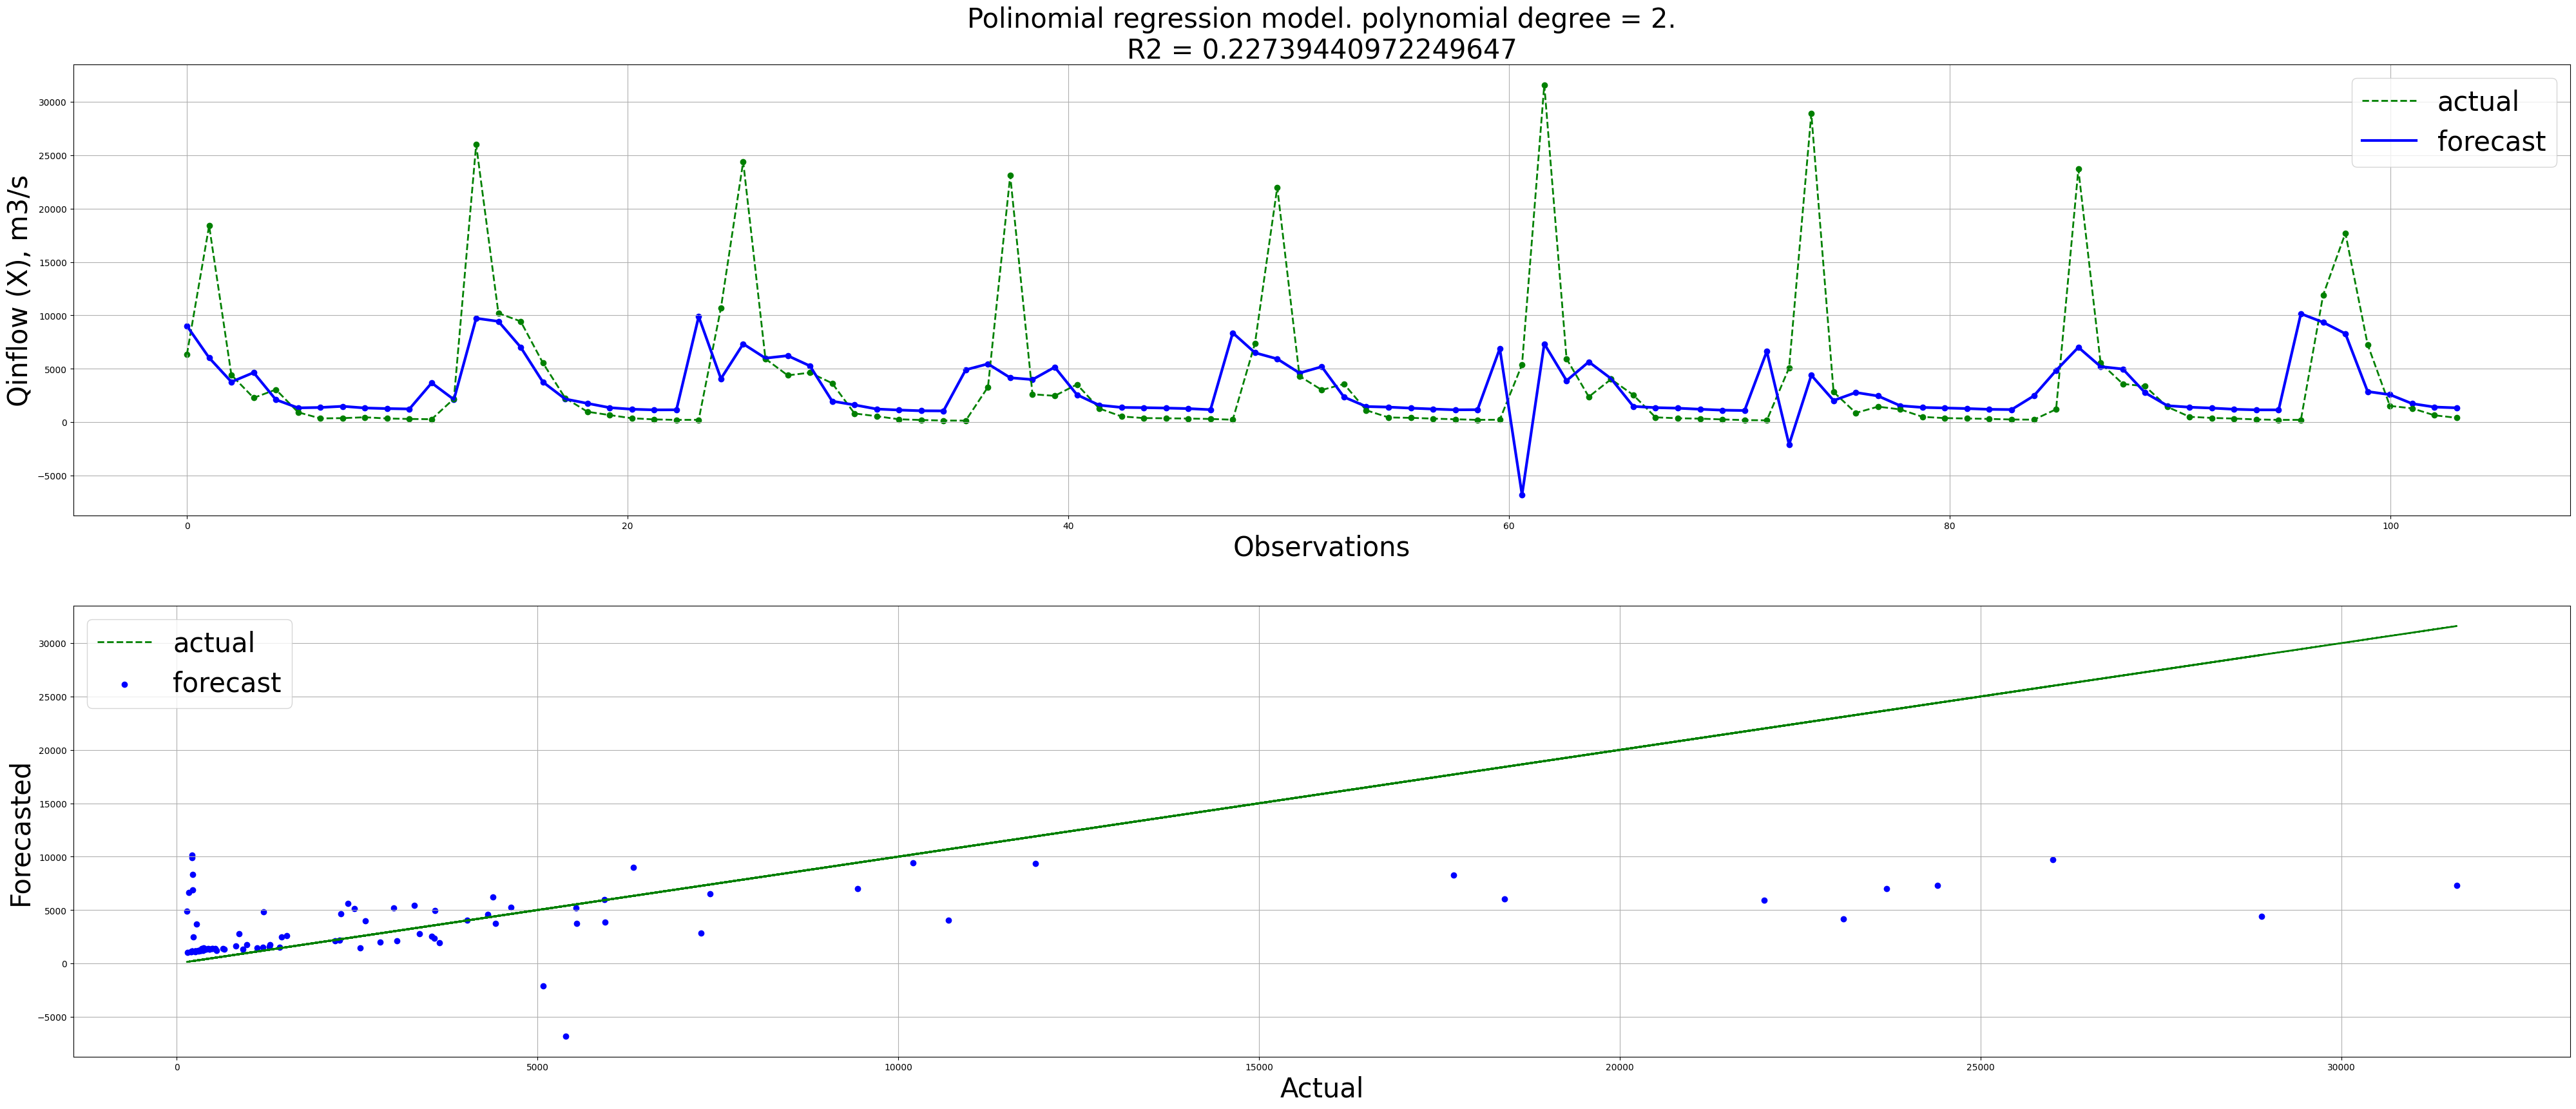

In [ ]:
#Визуализация результатов

x = np.linspace(0, X_test.shape[0], X_test.shape[0])
plt.figure(figsize=(50,20))
plt.subplot(2,1,1)
plt.title(f'Polinomial regression model. polynomial degree = {PF.degree}.\nR2 = {r2_score(y_test,y_pred_pipe)}', fontsize=30)
plt.scatter(x, y_pred_pipe, c='b')
plt.scatter(x, y_test, c='g')
plt.plot(x, y_test, '--g', linewidth=2, label='actual')
plt.plot(x, y_pred_pipe, '-b', linewidth=3, label='forecast')
plt.legend(fontsize=30)
plt.xlabel('Observations', fontsize=30)
plt.ylabel('Qinflow (X), m3/s', fontsize=30)
plt.grid()
plt.subplot(2,1,2)
plt.plot(y_test, y_test, '--g', linewidth=2, label='actual')
plt.scatter(y_test, y_pred_pipe, label='forecast', c='b')
plt.legend(fontsize=30)
plt.xlabel('Actual', fontsize=30)
plt.ylabel('Forecasted', fontsize=30)
plt.grid()

In [ ]:
PF = poly(degree=3, include_bias=True, interaction_only=False)
#Rid = Ridge(alpha=0.1)
LR = LinearRegression()
pipe = Pipeline([('polynomial_features', PF), ('lr', LR)])
pipe.fit(X_train, y_train)
scoring_pipe  = {'R2': 'r2',
           '-MSE': 'neg_mean_squared_error',
           '-MAE': 'neg_mean_absolute_error',
           'Max': 'max_error'}
scores_pipe = cross_validate(pipe, X_train, y_train, scoring = scoring_pipe, cv=ShuffleSplit(n_splits=5))
y_pred_pipe = pipe.predict(X_test)
print('Cross-Validation error')
DF_reg_pipe = pd.DataFrame(scores_pipe)
display(DF_reg_pipe)

print('Mean squared error on test_set: %.4f' % mse(y_test,y_pred_pipe))
print('Root Mean Square Error on test_set: %.4f' % mse(y_test,y_pred_pipe, squared=False))
print('Root Absolute Percented Error on test_set: %.4f' % MAPE(y_test,y_pred_pipe))
print('R2  on test_set: %.4f' %  r2_score(y_test,y_pred_pipe))

Cross-Validation error


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_Max
0,0.002923,0.002242,0.178329,-2.331988e+07,-2380.840081,-21230.663214
1,0.001772,0.001174,0.251249,-2.195837e+07,-2701.422598,-15600.979740
2,0.003016,0.001227,0.362844,-1.671203e+07,-2250.689904,-14099.541850
3,0.001856,0.001220,0.003192,-7.839088e+06,-1531.805467,-9177.503436
4,0.001738,0.001104,0.392519,-5.867527e+06,-1475.810242,-6980.666770


Mean squared error on test_set: 31361186.2993
Root Mean Square Error on test_set: 5600.1059
Root Absolute Percented Error on test_set: 546.2428
R2  on test_set: 0.3186


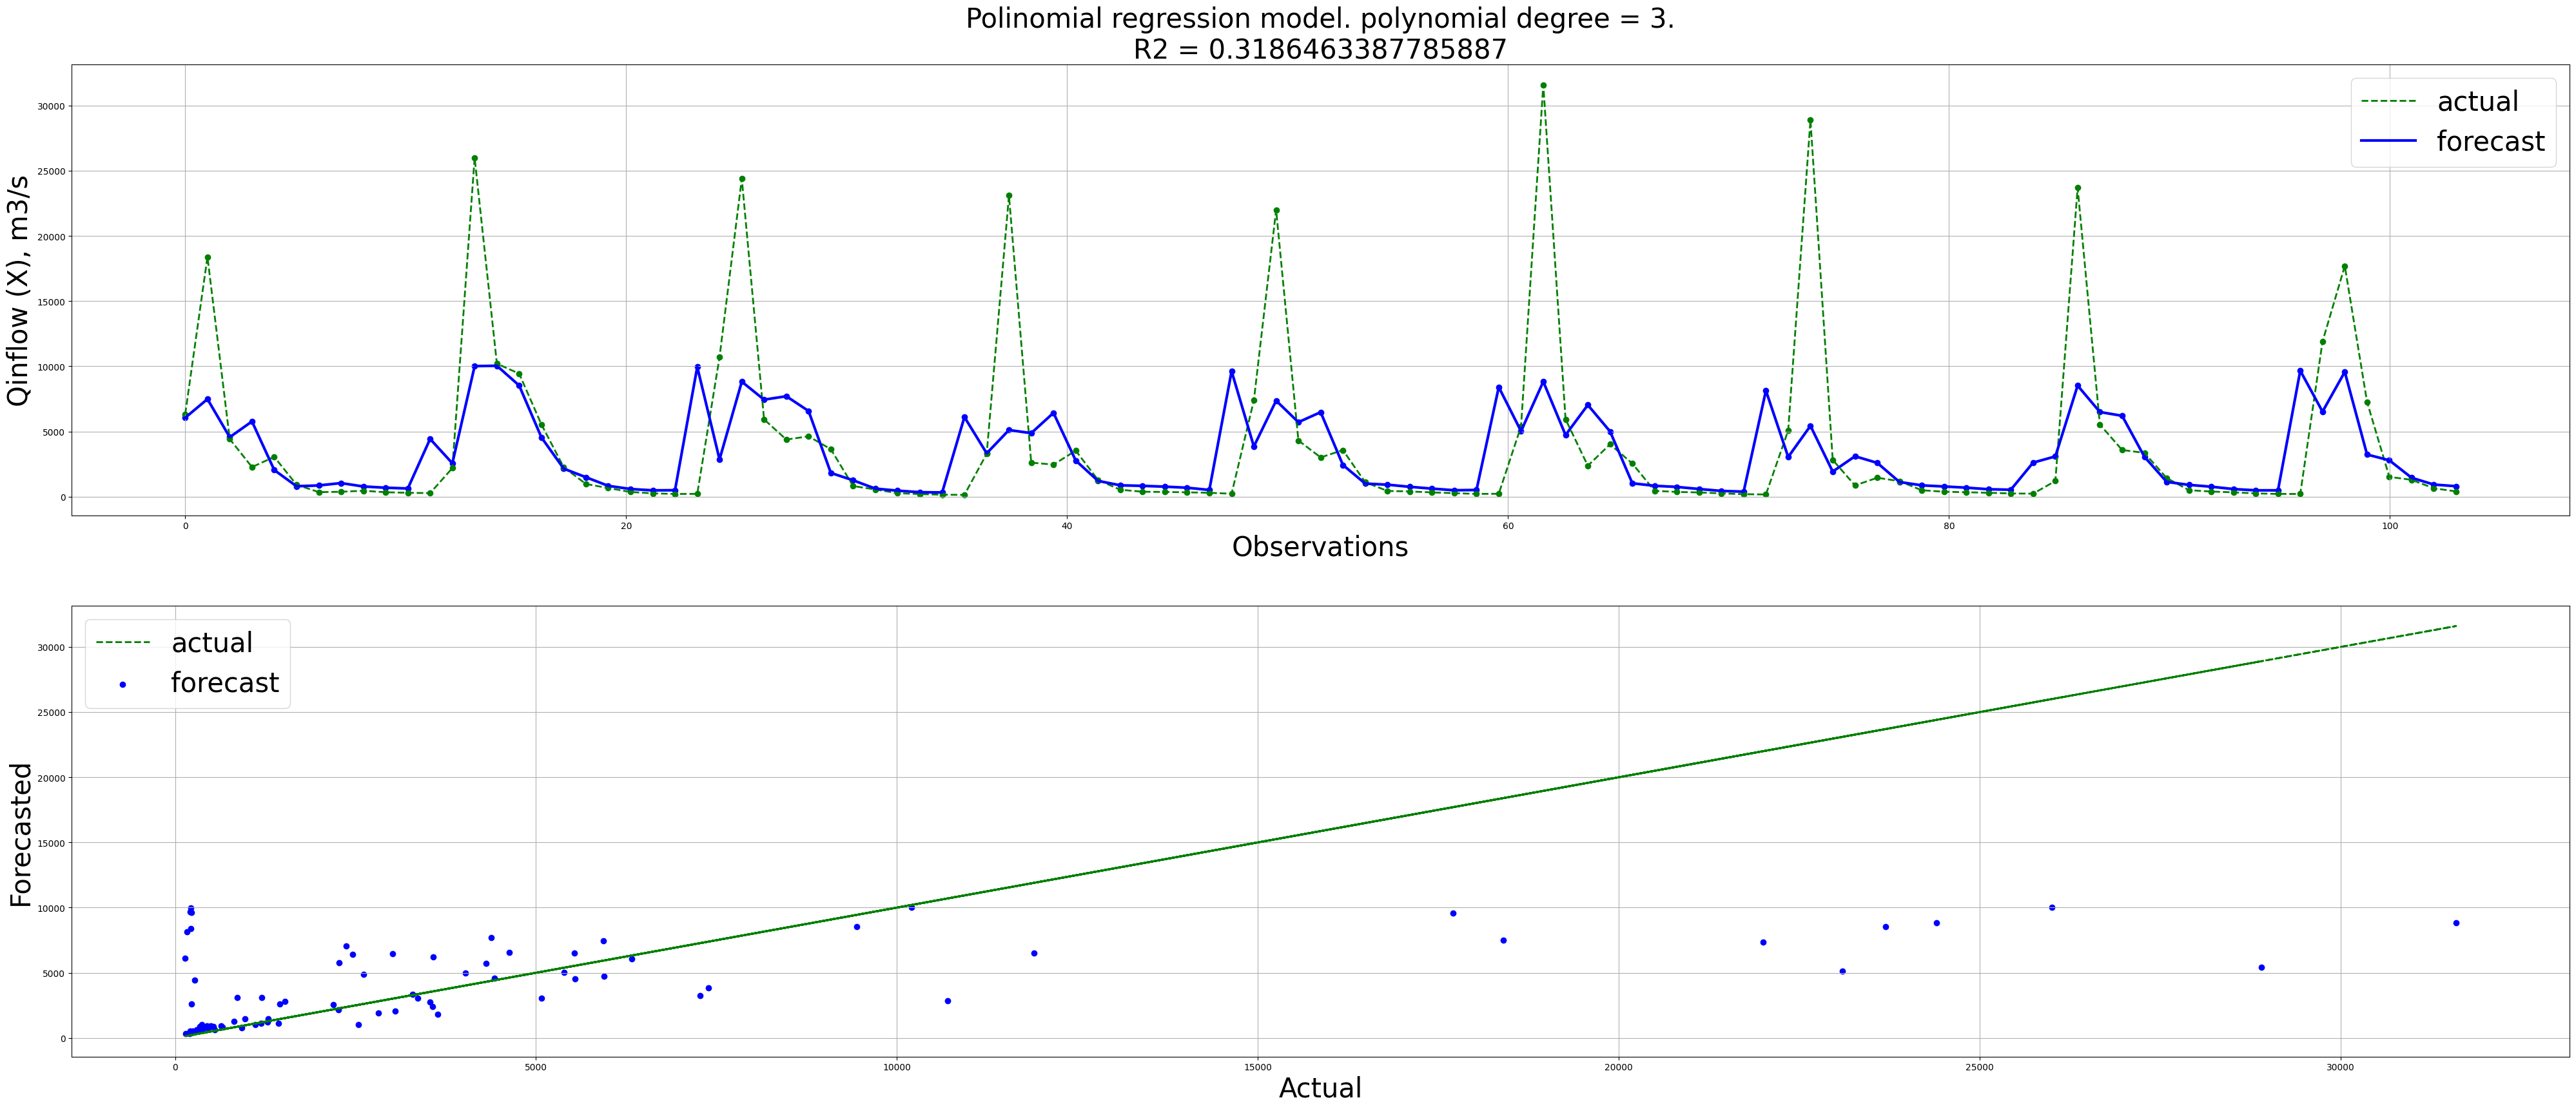

In [ ]:
#Визуализация результатов

x = np.linspace(0, X_test.shape[0], X_test.shape[0])
plt.figure(figsize=(50,20))
plt.subplot(2,1,1)
plt.title(f'Polinomial regression model. polynomial degree = {PF.degree}.\nR2 = {r2_score(y_test,y_pred_pipe)}', fontsize=30)
plt.scatter(x, y_pred_pipe, c='b')
plt.scatter(x, y_test, c='g')
plt.plot(x, y_test, '--g', linewidth=2, label='actual')
plt.plot(x, y_pred_pipe, '-b', linewidth=3, label='forecast')
plt.legend(fontsize=30)
plt.xlabel('Observations', fontsize=30)
plt.ylabel('Qinflow (X), m3/s', fontsize=30)
plt.grid()
plt.subplot(2,1,2)
plt.plot(y_test, y_test, '--g', linewidth=2, label='actual')
plt.scatter(y_test, y_pred_pipe, label='forecast', c='b')
plt.legend(fontsize=30)
plt.xlabel('Actual', fontsize=30)
plt.ylabel('Forecasted', fontsize=30)
plt.grid()

In [ ]:
PF = poly(degree=4, include_bias=True, interaction_only=False)
#Rid = Ridge(alpha=0.1)
LR = LinearRegression()
pipe = Pipeline([('polynomial_features', PF), ('lr', LR)])
pipe.fit(X_train, y_train)
scoring_pipe  = {'R2': 'r2',
           '-MSE': 'neg_mean_squared_error',
           '-MAE': 'neg_mean_absolute_error',
           'Max': 'max_error'}
scores_pipe = cross_validate(pipe, X_train, y_train, scoring = scoring_pipe, cv=ShuffleSplit(n_splits=5))
y_pred_pipe = pipe.predict(X_test)
print('Cross-Validation error')
DF_reg_pipe = pd.DataFrame(scores_pipe)
display(DF_reg_pipe)

print('Mean squared error on test_set: %.4f' % mse(y_test,y_pred_pipe))
print('Root Mean Square Error on test_set: %.4f' % mse(y_test,y_pred_pipe, squared=False))
print('Root Absolute Percented Error on test_set: %.4f' % MAPE(y_test,y_pred_pipe))
print('R2  on test_set: %.4f' %  r2_score(y_test,y_pred_pipe))

Cross-Validation error


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_Max
0,0.002568,0.001771,0.290703,-3.201450e+07,-3289.585190,-20883.090573
1,0.002918,0.001892,0.375052,-1.898767e+07,-2541.993016,-13445.328112
2,0.002390,0.001595,0.057543,-1.559449e+07,-2460.959014,-9430.907320
3,0.002278,0.001519,0.273232,-1.667678e+07,-2382.894738,-13333.215677
4,0.002125,0.001503,0.317701,-2.382032e+07,-2638.501700,-19504.997901


Mean squared error on test_set: 30978452.5929
Root Mean Square Error on test_set: 5565.8290
Root Absolute Percented Error on test_set: 569.4475
R2  on test_set: 0.3270


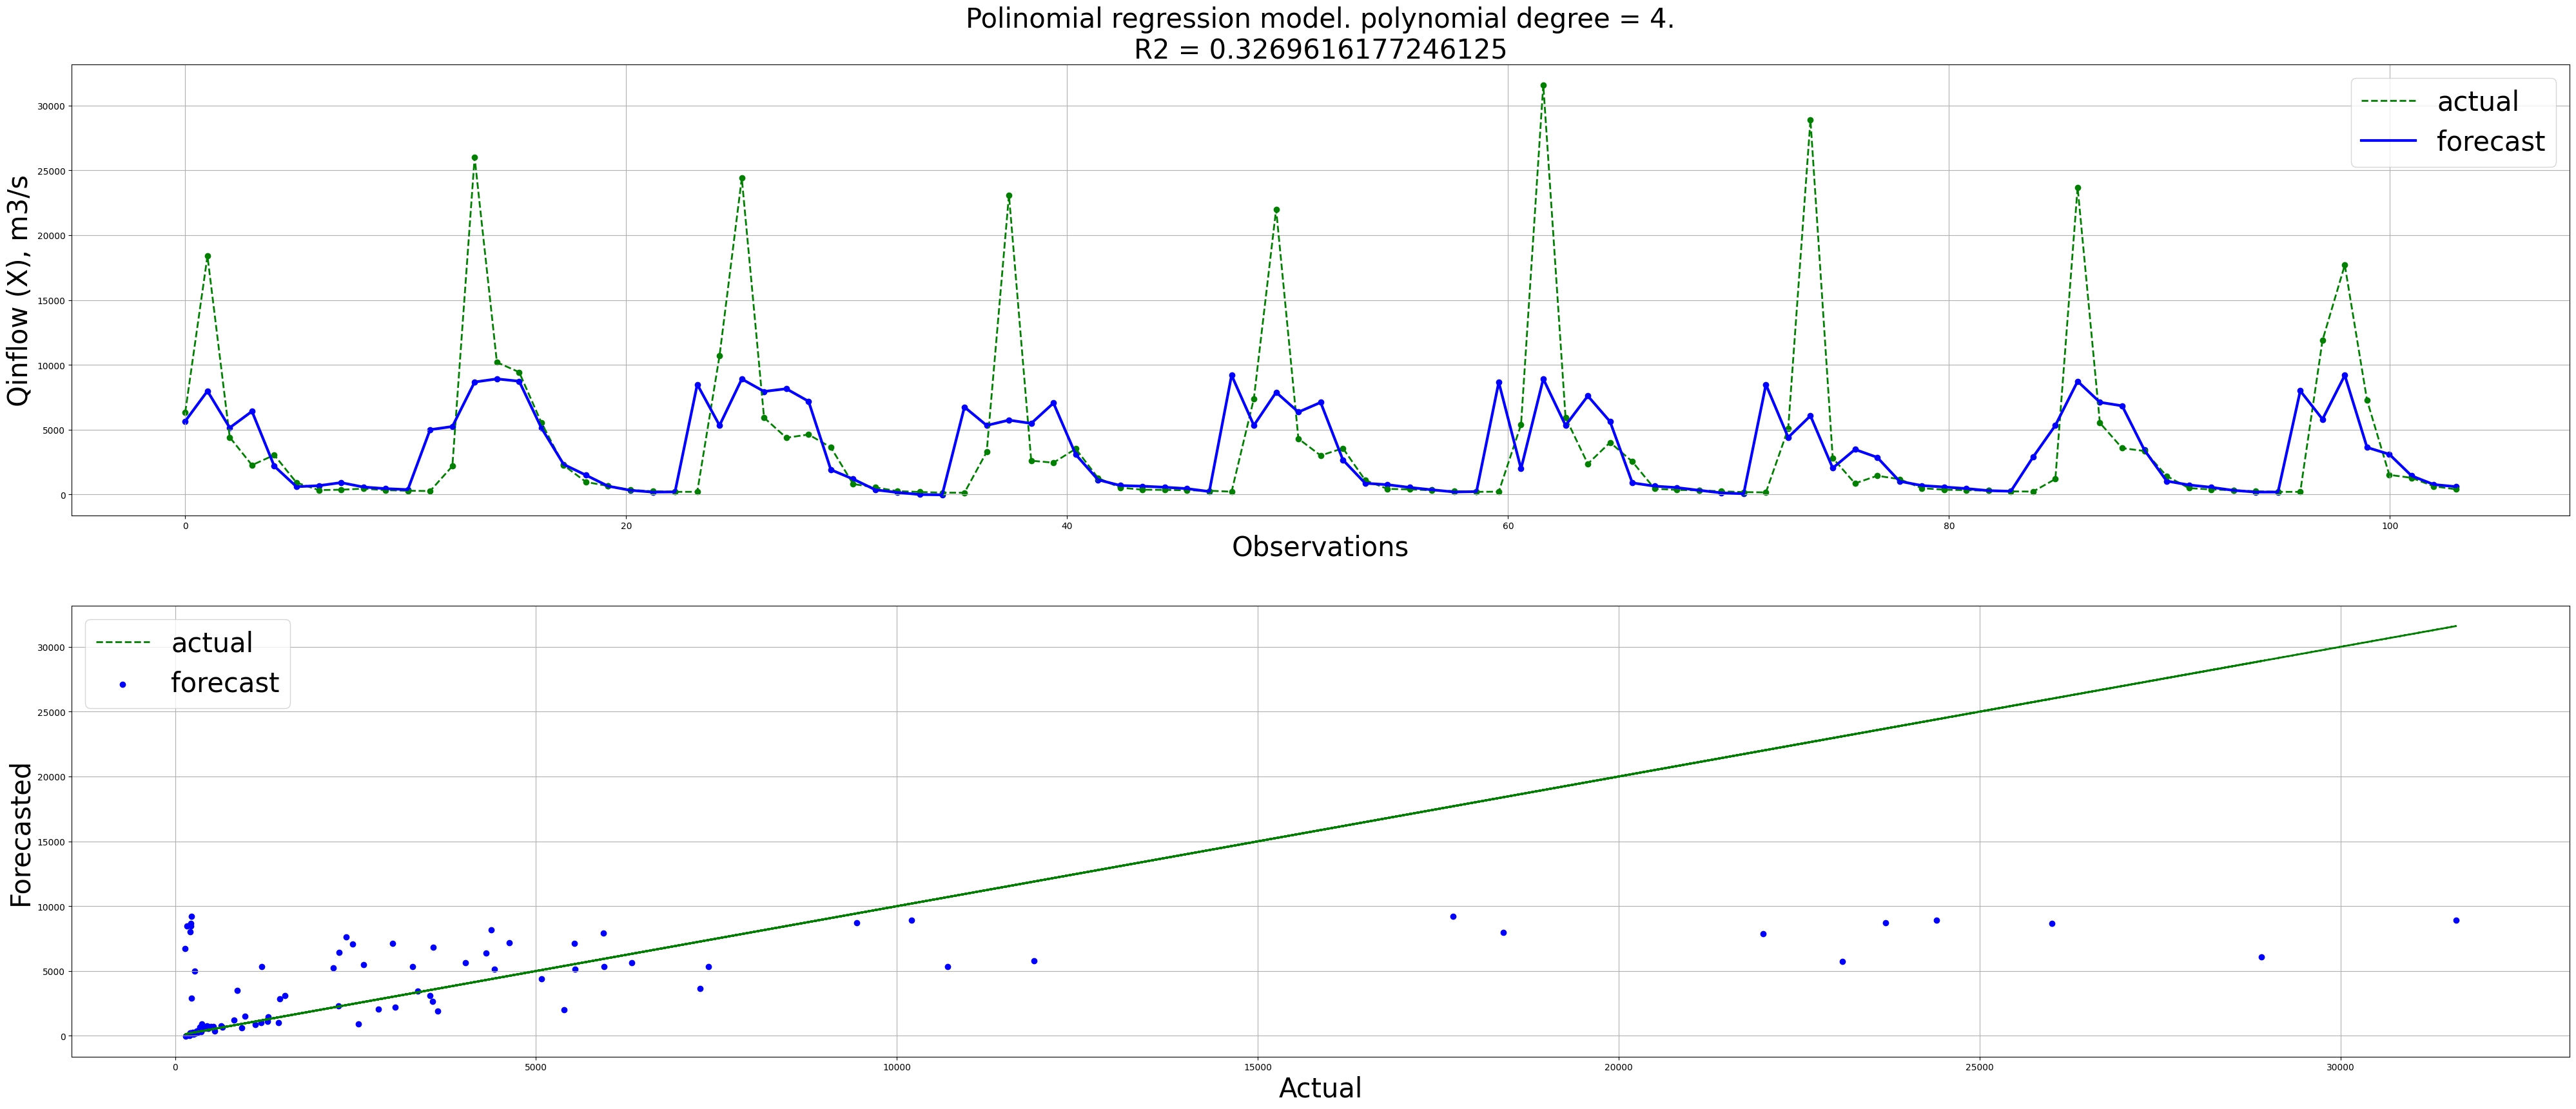

In [ ]:
#Визуализация результатов

x = np.linspace(0, X_test.shape[0], X_test.shape[0])
plt.figure(figsize=(50,20))
plt.subplot(2,1,1)
plt.title(f'Polinomial regression model. polynomial degree = {PF.degree}.\nR2 = {r2_score(y_test,y_pred_pipe)}', fontsize=30)
plt.scatter(x, y_pred_pipe, c='b')
plt.scatter(x, y_test, c='g')
plt.plot(x, y_test, '--g', linewidth=2, label='actual')
plt.plot(x, y_pred_pipe, '-b', linewidth=3, label='forecast')
plt.legend(fontsize=30)
plt.xlabel('Observations', fontsize=30)
plt.ylabel('Qinflow (X), m3/s', fontsize=30)
plt.grid()
plt.subplot(2,1,2)
plt.plot(y_test, y_test, '--g', linewidth=2, label='actual')
plt.scatter(y_test, y_pred_pipe, label='forecast', c='b')
plt.legend(fontsize=30)
plt.xlabel('Actual', fontsize=30)
plt.ylabel('Forecasted', fontsize=30)
plt.grid()

In [ ]:
PF = poly(degree=5, include_bias=True, interaction_only=False)
#Rid = Ridge(alpha=0.1)
LR = LinearRegression()
pipe = Pipeline([('polynomial_features', PF), ('lr', LR)])
pipe.fit(X_train, y_train)
scoring_pipe  = {'R2': 'r2',
           '-MSE': 'neg_mean_squared_error',
           '-MAE': 'neg_mean_absolute_error',
           'Max': 'max_error'}
scores_pipe = cross_validate(pipe, X_train, y_train, scoring = scoring_pipe, cv=ShuffleSplit(n_splits=5))
y_pred_pipe = pipe.predict(X_test)
print('Cross-Validation error')
DF_reg_pipe = pd.DataFrame(scores_pipe)
display(DF_reg_pipe)

print('Mean squared error on test_set: %.4f' % mse(y_test,y_pred_pipe))
print('Root Mean Square Error on test_set: %.4f' % mse(y_test,y_pred_pipe, squared=False))
print('Root Absolute Percented Error on test_set: %.4f' % MAPE(y_test,y_pred_pipe))
print('R2  on test_set: %.4f' %  r2_score(y_test,y_pred_pipe))

Cross-Validation error


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_Max
0,0.017736,0.002385,-0.502214,-1.939089e+07,-2623.908645,-11919.323191
1,0.010027,0.002038,0.179984,-1.698330e+07,-2474.382980,-15580.547072
2,0.018718,0.012009,0.211523,-2.780843e+07,-3357.793834,-15695.375614
3,0.003098,0.012379,0.046161,-1.539823e+07,-2118.339514,-17014.972834
4,0.012977,0.002397,0.458530,-1.277349e+07,-2460.679596,-12373.284618


Mean squared error on test_set: 33245238.3240
Root Mean Square Error on test_set: 5765.8684
Root Absolute Percented Error on test_set: 562.5767
R2  on test_set: 0.2777


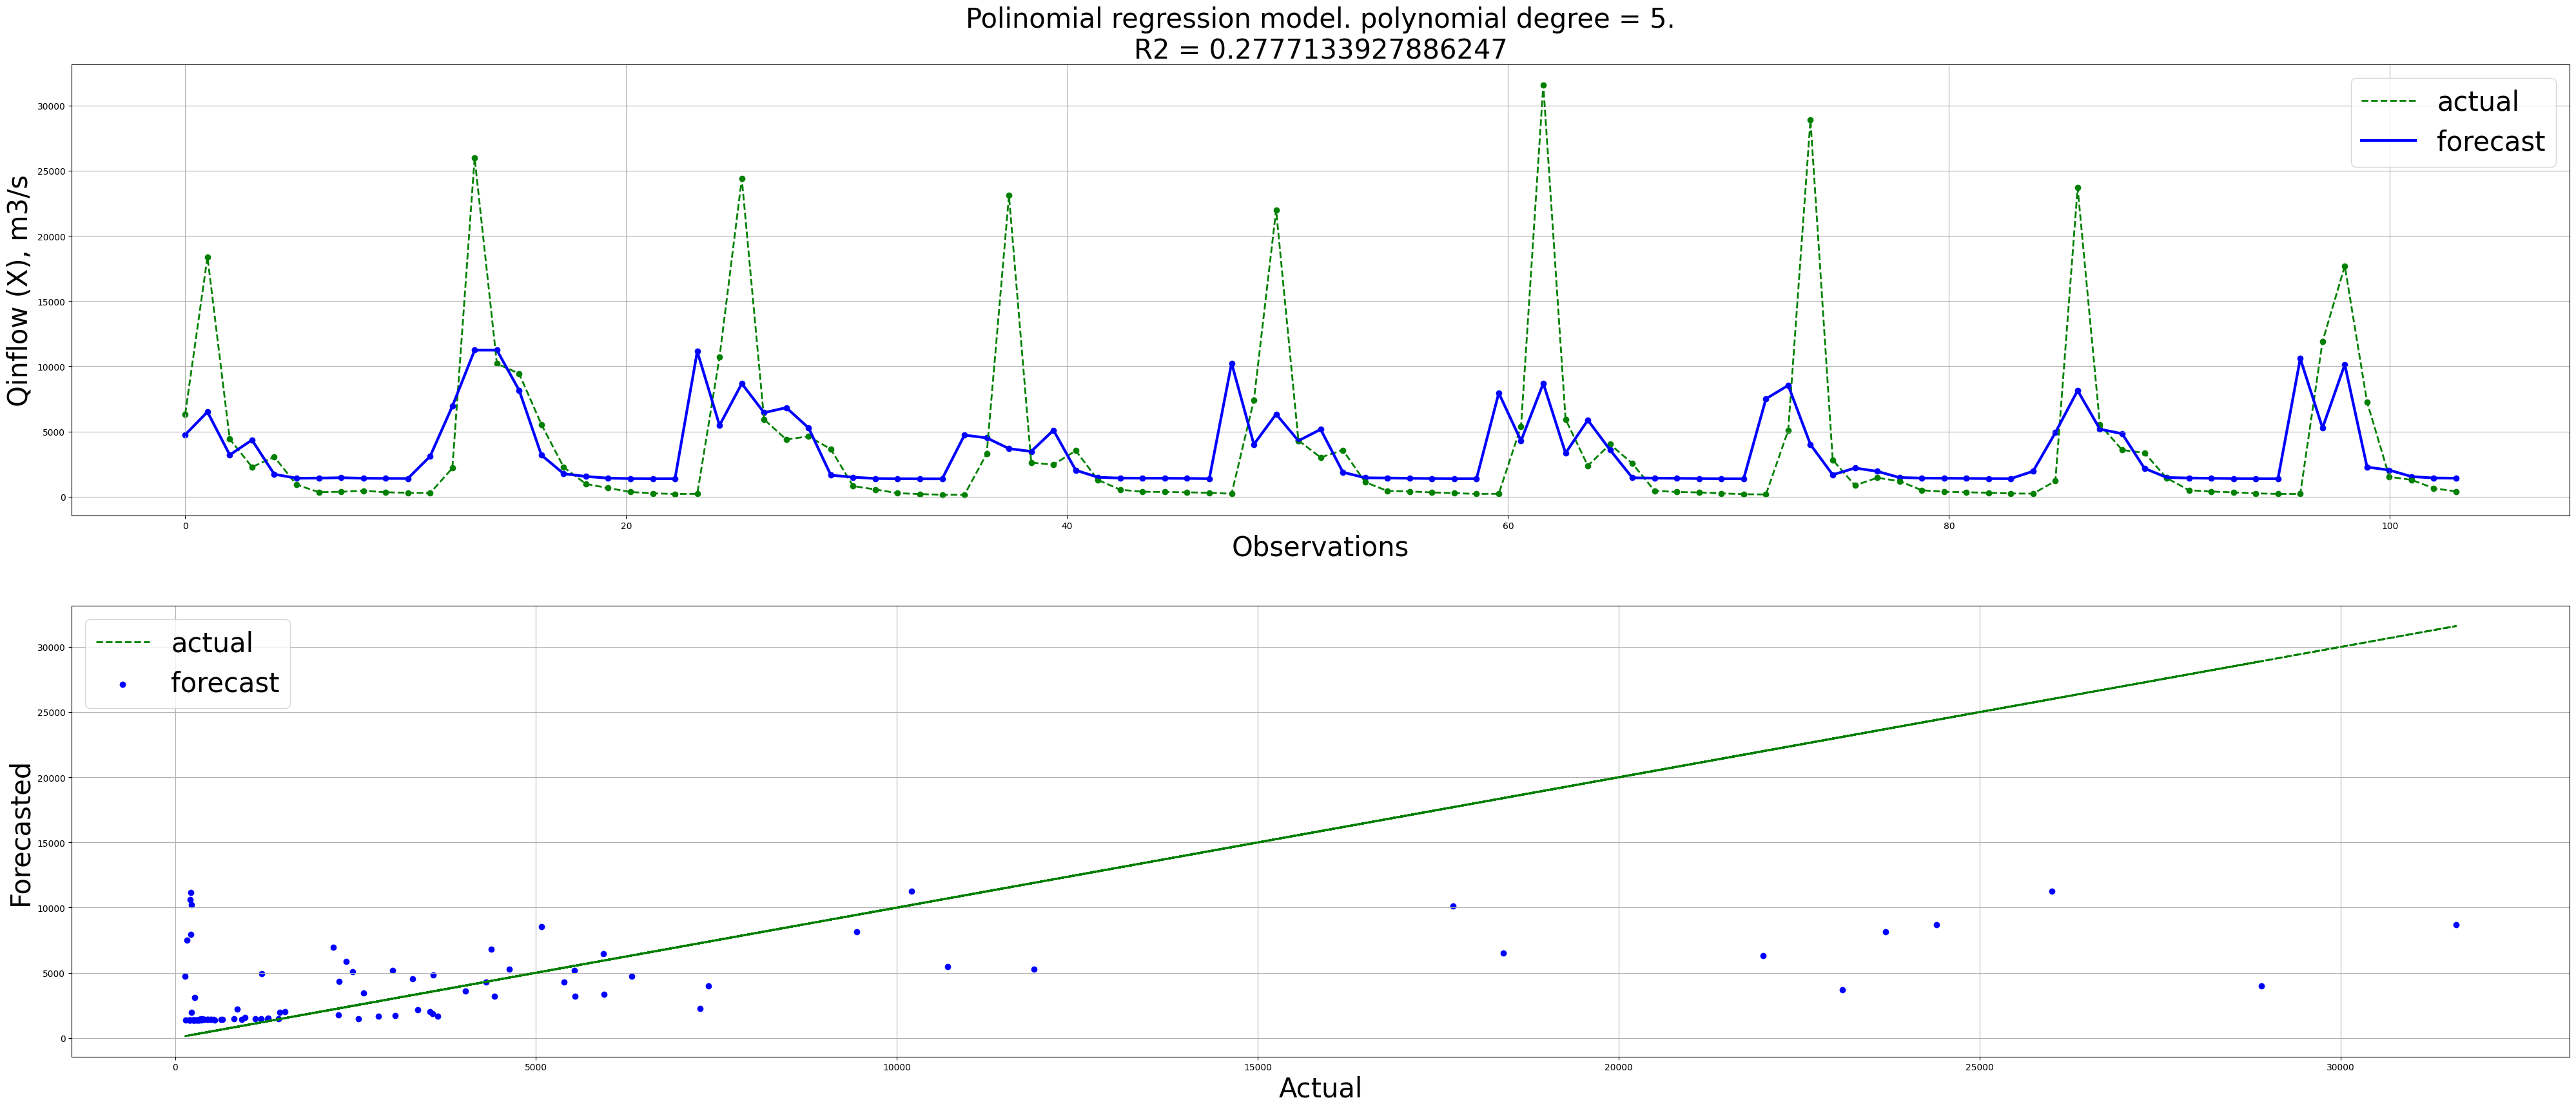

In [ ]:
#Визуализация результатов

x = np.linspace(0, X_test.shape[0], X_test.shape[0])
plt.figure(figsize=(50,20))
plt.subplot(2,1,1)
plt.title(f'Polinomial regression model. polynomial degree = {PF.degree}.\nR2 = {r2_score(y_test,y_pred_pipe)}', fontsize=30)
plt.scatter(x, y_pred_pipe, c='b')
plt.scatter(x, y_test, c='g')
plt.plot(x, y_test, '--g', linewidth=2, label='actual')
plt.plot(x, y_pred_pipe, '-b', linewidth=3, label='forecast')
plt.legend(fontsize=30)
plt.xlabel('Observations', fontsize=30)
plt.ylabel('Qinflow (X), m3/s', fontsize=30)
plt.grid()
plt.subplot(2,1,2)
plt.plot(y_test, y_test, '--g', linewidth=2, label='actual')
plt.scatter(y_test, y_pred_pipe, label='forecast', c='b')
plt.legend(fontsize=30)
plt.xlabel('Actual', fontsize=30)
plt.ylabel('Forecasted', fontsize=30)
plt.grid()

In [ ]:
# Сводная таблица параметров оценки качества прогноза
inflow_data2 = pd.read_excel('/content/drive/MyDrive/ЛР2.xlsx', sheet_name= 'Результаты')
data = pd.DataFrame(data=inflow_data2)
data

,Unnamed: 0,Линейнаяя регрессия,Полиномиальная регрессия (ст.2),Полиномиальная регрессия (ст.3),Полиномиальная регрессия (ст.4),Полиномиальная регрессия (ст.5)
0,MSE,4.337668e+07,3.556131e+07,3.136119e+07,3.097845e+07,3.324524e+07
1,RMSE,6.586097e+03,5.963330e+03,5.600106e+03,5.565829e+03,5.765868e+03
2,RAPE,5.879883e+02,5.479142e+02,5.462428e+02,5.694475e+02,5.625767e+02
3,R2,5.760000e-02,2.274000e-01,3.186000e-01,3.270000e-01,2.777000e-01


## Вывод

Изучены методы линейной и полиномиальной регрессии, применительно к задачам прогнозирования расхода в реке Нижняя Тунгуска. Получено, что при применении метода линейной регрессии R2 (коэффициент детерминации) = 0.0576. При исследовании полиномиальной регрессии получено, что при увеличении степени полинома до 4 R2 увеличивается, далее уменьшается. Из полученных результатов следует, что метод полиномиальной регрессии дает более точный результат в отличии от линейного (точность выше в 5,76 раз, при степени полинома 4), то есть число результатов, которые можно описать с помощью полиномиальной регрессии больше, чем с помощью линейной.